In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator, LogLocator
from plotpack import *
from myagkov_data import *
%matplotlib inline

In [2]:
# font size and style
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

scatsize = 50

In [3]:
directory = '/home/jnwelss/DWD/prototype-ice-habit/Prototype/output/'
directory2 = '/home/jnwelss/DWD/prototype-ice-habit/Python_Scripts/polarizability/'

r = str(2)
IGFt = 2
pre=''

In [4]:
file1     = directory+pre+'T_range_-30-0_p1010.0_dt1.0_t_end600_r_start'+r+'e-06_mD_1_IGF_'+str(IGFt)+'.out'
file1a    = directory+pre+'T_range_-30-0_p1010.0_dt1.0_t_end180_r_start'+r+'e-06_mD_1_IGF_'+str(IGFt)+'.out'
file2     = directory2+'curve_inherent.txt'
file3     = directory2+'curve_inherent2.txt'
filenew   = directory2+'IGF_new_reduced.txt'
filenew2  = directory2+'IGF_new_poly.txt'
filelow   = directory2+'curve_inherent_low.txt'
filefit   = directory2+'IGF_fitted.txt'

In [5]:
var       = ['t', 'T', 'a', 'b', 'phi', 'm', 'V', 'vt']
tab1      = pd.read_csv(file1, delimiter = ",", names=var, dtype= np.float128)
tab1a     = pd.read_csv(file1a, delimiter = ",", names=var)

rho_app  = tab1["m"] / tab1["V"]
rho_app2 = tab1a["m"] / tab1a["V"]
rho_app[0] = 919.
rho_app2[0] = 919.

pr       = np.zeros([rho_app.size])
pr2      = np.zeros([rho_app2.size])
T        = np.linspace(-30,0,301)


In [6]:
# Takahashi Windtunnel density data
TH_tab   = pd.read_csv('/home/jnwelss/DWD/ice_habit/paper_dat/JH_fig2_WT.dat', delimiter = ", ", names=['T','rho'], engine='python')
rho_TH   = np.zeros(len(tab1['T']))

def lookupTH(temp):
    if temp > TH_tab['T'].iloc[0]:
        return TH_tab['rho'].iloc[0]
    elif temp < TH_tab['T'].iloc[-1]:
        return TH_tab['rho'].iloc[-1]

    for i in range(len(TH_tab['T'])):
        if temp > TH_tab['T'][i+1]:
            interpolation = (temp - TH_tab['T'][i]) / (TH_tab['T'][i+1] - TH_tab['T'][i])
            gamma         = TH_tab['rho'][i] + interpolation * (TH_tab['rho'][i+1] - TH_tab['rho'][i])
            return gamma
            break

for i in range(len(tab1['T'])):
    rho_TH[i] = lookupTH(tab1['T'][i]-273.15)
pr3      = np.zeros([rho_TH.size])


In [7]:
var2       = ['T','IGF']
tab2       = pd.read_csv(file2,    delimiter = "   ", names=var2, engine='python')
tab3       = pd.read_csv(file3,    delimiter = "   ", names=var2, engine='python')
tabnew     = pd.read_csv(filenew,  delimiter = "   ", names=var2, engine='python')
tabnew2    = pd.read_csv(filenew2, delimiter = "   ", names=var2, engine='python')
tablow     = pd.read_csv(filelow,  delimiter = "   ", names=var2, engine='python')
tabfit     = pd.read_csv(filefit,  delimiter = "   ", names=var2, engine='python')

label = ['T91','Obs.','McS','McS  3 min','McS 10 min']

In [8]:
i = 0
for d in rho_app:
    phi   = tab1["phi"][i]
    pr[i] = polarizability_ratio(phi,min(d,917)) 
    i += 1

In [9]:
i = 0
for d in rho_app2:
    phi   = tab1a["phi"][i]
    pr2[i] = polarizability_ratio(phi,min(d,917)) 
    i += 1

In [10]:
i = 0
for d in rho_TH:
    phi   = tab1["phi"][i]
    pr3[i] = polarizability_ratio(phi,min(d,917)) 
    i += 1

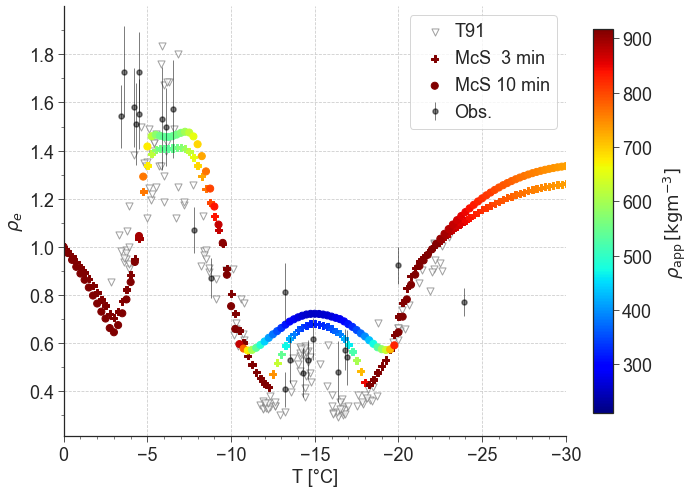

In [11]:
pp = PdfPages('pola_'+pre+r+'um_IGF'+str(IGFt)+'.pdf')
ncol = 1
fig, ax = plt.subplots(nrows=1, ncols=ncol, figsize=[10*ncol,8])
ax = plt.subplot(1, ncol, 1)
plt.scatter(TempDegC,polrat, c='white',edgecolors='grey', label=label[0], marker='v',s=scatsize, alpha=0.75)
plt.errorbar(ObsTempDegC,ObsMeanPolRat,yerr = ObsStdPolRat,fmt="o",color="black", linewidth=1, label=label[1], ms=5, alpha=0.5)
plt.scatter(tab1a["T"]-273.15,pr2, c=rho_app2, cmap='jet', label=label[3], marker='P',s=scatsize, norm=col.Normalize(vmin=210, vmax=917))
plt.scatter(tab1["T"]-273.15 ,pr,  c=rho_app,  cmap='jet', label=label[4], marker='o',s=scatsize, norm=col.Normalize(vmin=210, vmax=917))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
#plt.legend(l)
plt.xlabel('T [°C]')
plt.xlim(0,-30)
plt.ylabel('$\\rho_e$')
#plt.title('Polarizability ratio as function of Temperature and apparent ice density [$\mathrm{kg m}^{-3}$]')
plt.grid(visible=True,linestyle='--')
cbar=plt.colorbar(fraction=0.035)
cbar.set_label('$\\rho_\mathrm{app} \, [\mathrm{kg m}^{-3}]$ ',horizontalalignment='center', rotation=90, labelpad=10)
plt.legend(frameon=True, handletextpad=.1)
#f.savefig("T_pola_rho"+suf+".pdf", bbox_inches='tight')
plt.tight_layout(rect=[0, 0.0, 1, 0.9])

#ax = plt.subplot(1, ncol, 2)
#plt.xlabel('T [°C]')
#plt.xlim(0,-25)
#plt.ylabel('$ \\rho_\mathrm{app}$')
#plt.plot(tab1['T']-273.15, rho_app, label=label[2], alpha=0.75)
#mask_rho = np.ma.masked_where(tab1['T']>270.15, rho_TH)
#mask_rho = np.ma.masked_where(tab1['T']<255.15, mask_rho)
#plt.plot(tab1['T']-273.15, mask_rho, label='TH \'91', color='black', alpha=0.75)
#plt.legend()
pp.savefig(fig)

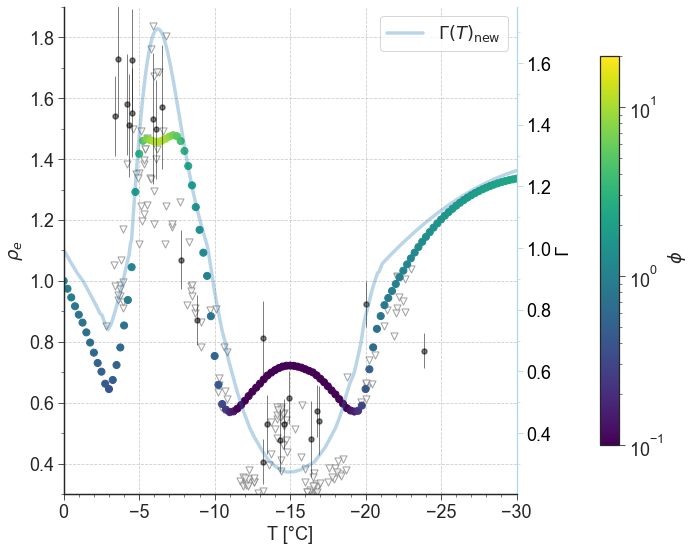

In [12]:
c2 = 'lightsteelblue'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,8])

ax.set_xlabel('T [°C]')
plt.xlim(0,-30)
ax.set_ylabel('$\\rho_e$')
ax.set_ylim(0.3,1.9)

#plt.title('Polarizability ratio as function of Temperature and $\\rho_\mathrm{app}$')
ax.grid(visible=True,linestyle='--')

plt.scatter(TempDegC,polrat, c='white',edgecolors='grey', label=label[0], marker='v',s=scatsize, alpha=0.75)
plt.errorbar(ObsTempDegC,ObsMeanPolRat,yerr = ObsStdPolRat,fmt="o",color="black", linewidth=1, label=label[1], ms=5, alpha=0.5)
plt.scatter(tab1["T"]-273.15,pr, c=tab1["phi"], cmap='viridis', label=label[2], s=scatsize,norm=col.LogNorm(vmin=0.1,vmax=20) )
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax2 = ax.twinx()
ax2.tick_params(axis="y")

ax2.spines['right'].set_color('lightblue')
ax2.set_ylabel('$\Gamma$', color='black')
ax2.tick_params(axis="y", which='both',color='lightblue', labelcolor='black')
ax2.yaxis.set_minor_locator(MultipleLocator(.1))
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.spines["right"].set_visible(True)
#ax2.plot(tab2["T"], tab2["IGF"], alpha=0.3, label='$\Gamma(T)$')
ax2.plot(tabfit["T"], tabfit["IGF"], alpha=0.3, label='$\Gamma(T)_\mathrm{new}$')

#plt.legend(l)
cbar=plt.colorbar(ax=ax2, pad = 0.15,fraction=0.035)
cbar.set_label('$\\phi$',horizontalalignment='right', rotation=90, labelpad=3)
plt.legend(frameon=True)

#plt.tight_layout(rect=[0, 0.0, 1, 0.9])
fig.tight_layout()
pp.savefig(fig)

In [13]:
from l_w_relations_um import *

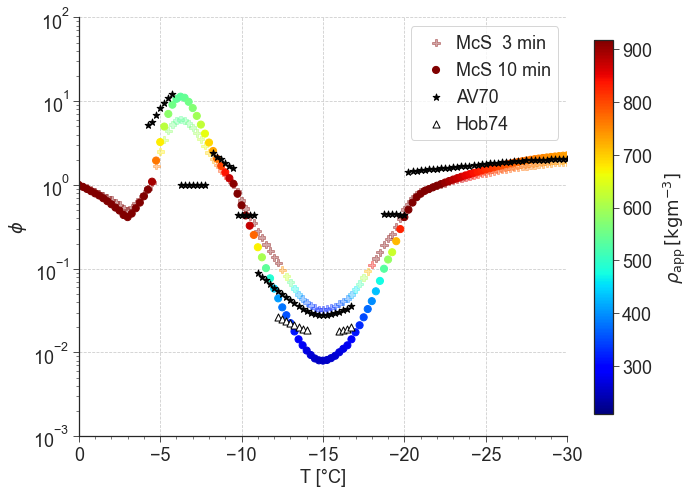

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,8])
ax = plt.subplot(1, 1, 1)
plt.scatter(tab1a["T"]-273.15,tab1a["phi"], c=rho_app2, cmap='jet', label=label[3], marker='P', s=scatsize, norm=col.Normalize(vmin=210, vmax=917), alpha=0.35 )
plt.scatter(tab1["T"]-273.15, tab1["phi"],  c=rho_app,   cmap='jet', label=label[4], marker='o', s=scatsize, norm=col.Normalize(vmin=210, vmax=917) )

plt.xlabel('T [°C]')
plt.xlim(0,-30)
plt.ylim(0.001,100)
plt.yscale("log")
plt.ylabel('$\phi$')
#plt.title('T-dependence of $\phi$')
plt.grid(visible=True,linestyle='--')
cbar=plt.colorbar(fraction=0.035)
cbar.set_label('$\\rho_\mathrm{app} \, [\mathrm{kg m}^{-3}]$ ',horizontalalignment='center', rotation=90, labelpad=10)
ax.xaxis.set_minor_locator(MultipleLocator(1))


phi_av  = np.zeros(len(tab1["T"]))
phi_hob = np.zeros(len(tab1["T"]))

for temp in enumerate(tab1["T"]):
    ind = temp[0]
    Te  = temp[1] - 273.15
    L = 2. * tab1["b"][ind]
    W = 2. * tab1["a"][ind]
    L, W = lw_relation(L,W,Te)
    if ( (Te < -12) and (Te > -17.) ):
        L2 = h74_hexplate(W)
        if L2 == None:
            phi_hob[ind] = None
        else:
            phi_hob[ind] =( L2 / W )
    
    if (L == None) or (W == None):
        phi_av[ind] = None
    else:
        phi_av[ind] =( L / W )
        
plt.scatter(tab1["T"]-273.15,phi_av, color='black',label='AV70', marker='*', s=scatsize)
plt.scatter(tab1["T"]-273.15,phi_hob, c='white',edgecolor='black',label='Hob74', marker='^', s=scatsize)

plt.legend(frameon=True,handletextpad=.1)
plt.tight_layout(rect=[0, 0.0, 1, 0.9])
pp.savefig(fig)


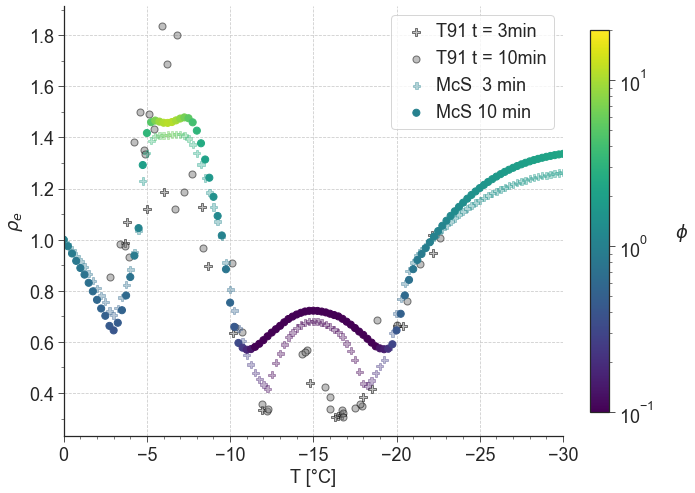

In [15]:
nrow, ncol = [1,1]
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=[10*ncol,8*nrow])


ax = plt.subplot(nrow, ncol, 1)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
plt.xlabel('T [°C]')
plt.xlim(0,-30)
plt.ylabel('$\\rho_e$')
#times = [3, 4, 5, 7, 10, 12, 15, 17, 20]
times = [3, 10]
signs=['P','o','>','*','p','D','s','v','<']
for i in range(len(times)):
    plt.scatter(TempDegC[TimeMin == times[i]],polrat[TimeMin == times[i]], c='grey',edgecolors='black', label='T91 t = '+str(times[i])+'min', marker=signs[i],s=scatsize, alpha=0.5)
plt.scatter(tab1a["T"]-273.15,pr2, c=tab1a["phi"], cmap='viridis', label=label[3], marker='P', s=scatsize,norm=col.LogNorm(vmin=0.1,vmax=20), alpha=0.35 )
plt.scatter(tab1["T"]-273.15, pr,  c=tab1["phi"],  cmap='viridis', label=label[4], marker='o', s=scatsize,norm=col.LogNorm(vmin=0.1,vmax=20) )
plt.grid(visible=True,linestyle='--')
cbar=plt.colorbar(fraction=0.035)
cbar.set_label('$\phi$',horizontalalignment='right', rotation=0, labelpad=35)
plt.legend(frameon=True,handletextpad=.1)
plt.tight_layout(rect=[0, 0.0, 1, 0.9])
pp.savefig(fig)

#ax = plt.subplot(nrow, ncol, 1)
#plt.scatter(TempDegC[TimeMin <=10],polrat[TimeMin <=10], c='white',edgecolors='grey', label='T91 t <= 10min', marker='v',s=scatsize, alpha=0.85)
#plt.scatter(TempDegC[TimeMin >10],polrat[TimeMin >10], c='white',edgecolors='tab:blue', label='T91 t > 10min', marker='^',s=scatsize, alpha=0.85)
#plt.scatter(tab1a["T"]-273.15,pr2, c=tab1a["phi"], cmap='viridis', label=label[3], marker='P', s=scatsize,norm=col.LogNorm(vmin=0.1,vmax=20), alpha=0.35 )
#plt.scatter(tab1["T"]-273.15,pr, c=tab1["phi"], cmap='viridis', label=label[4], s=scatsize,norm=col.LogNorm(vmin=0.1,vmax=20) )

#plt.legend(l)
#plt.xlabel('T [°C]')
#plt.xlim(0,-30)
#plt.ylabel('$\\rho_e$')
#plt.title('Polarizability ratio as function of Temperature and apparent ice density [$\mathrm{kg m}^{-3}$]')
#plt.grid(visible=True,linestyle='--')
#cbar=plt.colorbar(fraction=0.035)
#cbar.set_label('$\phi$',horizontalalignment='right', rotation=0, labelpad=35)
#plt.legend()
#plt.tight_layout(rect=[0, 0.0, 1, 0.9])

In [16]:
# Temperature and IGF values from Tab.2 from Takahashi'91
T_TH = np.array([-3.7,-5.2,-8.6,-10.6,-12.2,-14.4,-16.5,-18.2,-20.1,-22.0])
#IGF = d ln(c) / d ln(a)
IGF_TH= np.array( [0.913,3.222,1.093,1.104,0.478,0.510,0.649,0.328,0.815,0.980] )
IGF_TH_short = np.array( [0.913,5.417,1.093,1.104,1.189,0.565,0.889,0.328,0.815,0.980] )


tab=np.array([T_TH,IGF_TH,IGF_TH_short]).T
tab=tab[::-1]
sc =np.zeros(len(IGF_TH))

for i in range(len(IGF_TH)):
    if IGF_TH[i] == IGF_TH_short[i]:
        sc[i] = scatsize-35
    else:
        sc[i] = scatsize

In [17]:
def lookup(temp):
    if temp > tab[0,0]:
        return tab[0,1]
    elif temp < tab[-1,0]:
        return tab[-1,1]

    for i in range(0,len(tab[:,0])):
        if tab[i,0] > temp:
            interpolation = (temp - tab[i-1,0]) / (tab[i,0] - tab[i-1,0])
            gamma         = tab[i-1,1] + interpolation * (tab[i,1] - tab[i-1,1])
            return gamma
            break

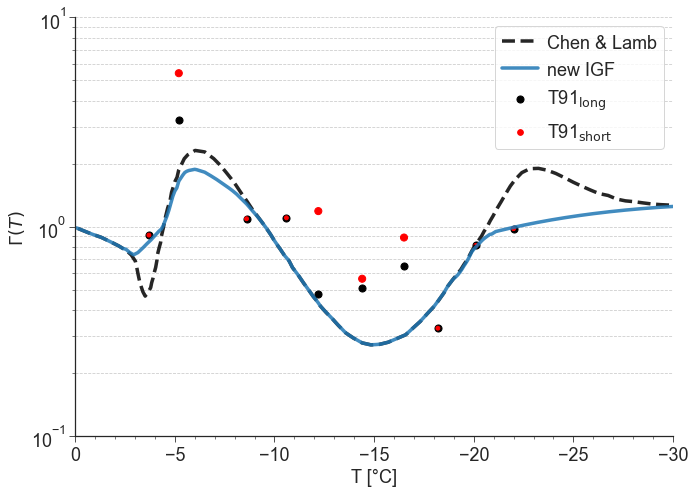

In [18]:
tabnew   = pd.read_csv(filenew, delimiter = "   ", names=var2, engine='python')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,8])
ax = plt.subplot(111)
plt.plot(tab2["T"],tab2['IGF'], alpha=0.85, label='Chen & Lamb', c='black',linestyle='--')
#ax = plt.plot(tab3["T"],tab3['IGF'], c='green',alpha=0.5, label='$\Gamma(T)_{altern}$',linestyle='--')
#ax = plt.plot(tabnew["T"],tabnew["IGF"], label='$\Gamma(T)_{new}$', alpha=0.6,c='black')
plt.plot(tabnew2["T"],tabnew2["IGF"], label='new IGF', alpha=0.85, linestyle='-')
plt.scatter(T_TH,IGF_TH, label='T91$_\mathrm{long}$',c='black', s=scatsize)
plt.scatter(T_TH,IGF_TH_short, label='T91$_\mathrm{short}$',c='red', s=sc)
#ax = plt.plot(T_TH,IGF_TH, label='TH curve', alpha=0.3,c='black')
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(.1))

plt.xlim(0,-30)
plt.ylim(0.1,10)
plt.ylabel('$\Gamma(T)$')
plt.xlabel('T [°C]')
plt.yscale("log")
plt.grid(visible=True, axis='y',which='both', linestyle='--')
#plt.title('T-dependence of $\Gamma$')

plt.tight_layout(rect=[0, 0.0, 1, 0.9])
plt.legend(frameon=True,handletextpad=.5)
pp.savefig(fig)

In [19]:
pp.close()

<h3> New IGF</h3>

In [20]:
from scipy.optimize import curve_fit


In [21]:
# define the polynomial
def model_func(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f 
def model_lin(x,u,v,w):
    return u * x**2 + v * x + w

In [22]:
thresh = -16
thresh2=-21
opt, pcov = curve_fit(model_func, tabnew['T'][tabnew["T"]<thresh], tabnew['IGF'][tabnew["T"]<thresh])
opt2, pcov2 = curve_fit(model_lin, tabnew['T'][tabnew["T"]<thresh2], tabnew['IGF'][tabnew["T"]<thresh2])
a, b, c, d, e, f = opt
u, v, w = opt2
x = T[T<thresh]
x2 = T[T<thresh2]
y = model_func(x, a, b, c, d, e, f)
y2= model_lin(x2,u,v,w)
#print(tabnew['T'][tabnew["T"]<-20], y[x<-20])

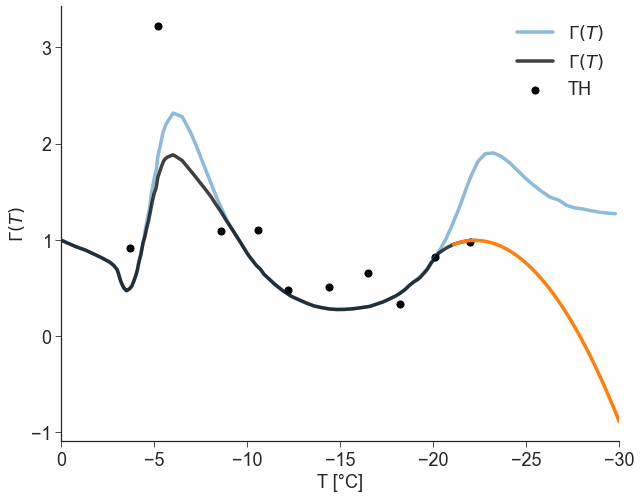

In [23]:
tabnew   = pd.read_csv(filenew, delimiter = "   ", names=var2, engine='python')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,8])
ax = plt.subplot(1, 1, 1)
plt.plot(tab2["T"],tab2['IGF'], alpha=0.5, label='$\Gamma(T)$')
plt.plot(tabnew["T"],tabnew['IGF'],alpha=0.75, label='$\Gamma(T)$',c='black')
plt.scatter(T_TH,IGF_TH, label='TH',c='black', s=scatsize)
plt.plot(x2,y2)

plt.xlim(-0,-30)
plt.ylabel('$\Gamma(T)$')
plt.xlabel('T [°C]')

plt.legend()

#form      = ('%5.3f   %7.6f')
#var       = np.zeros([len(T),2])
#for i in range(len(x2)):
#    var[i,0] = x2[i]
#    var[i,1] = y2[i]

#np.savetxt('IGF_new_red.txt', var, fmt=form)

In [24]:
def lookup2(temp):
    if temp > tabnew['T'].iloc[-1]:
        return tabnew['IGF'].iloc[-1]
    elif temp < tabnew['T'].iloc[0]:
        return tabnew['IGF'].iloc[0]

    for i in range(len(tabnew['T'])):
        if tabnew['T'][i] > temp:
            interpolation = (temp - tabnew['T'][i-1]) / (tabnew['T'][i] - tabnew['T'][i-1])
            gamma         = tabnew['IGF'][i-1] + interpolation * (tabnew['IGF'][i] - tabnew['IGF'][i-1])
            return gamma
            break

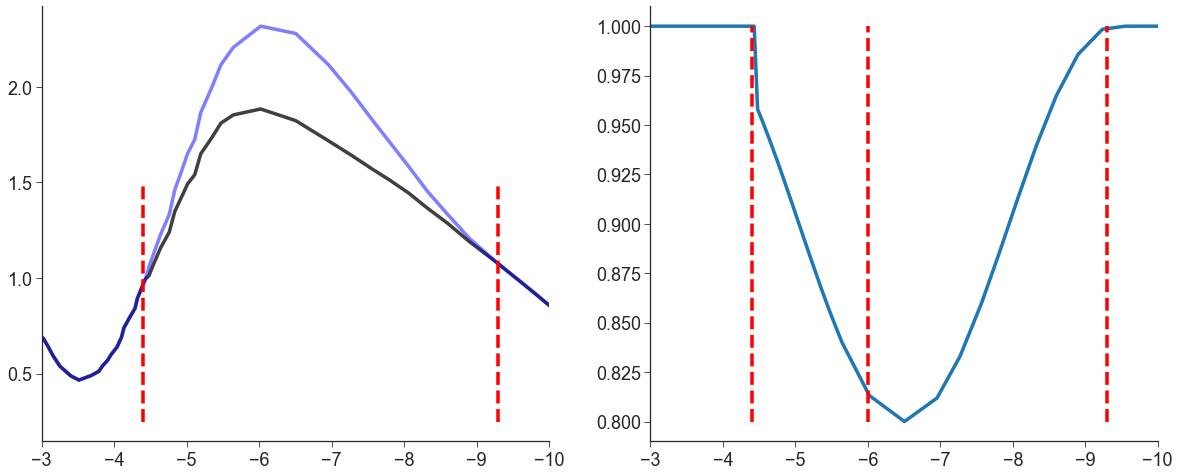

In [25]:
IGF = np.zeros(len(tablow['IGF']))
factor = np.zeros(len(tablow['IGF']))
for i in range(len(tablow['IGF'])):
    if tablow['IGF'][i] > 1.:
        factor[i] = (0.9 + 0.1 * np.cos(np.pi / 2.9 * (tablow['T'][i] + 3.6) ) )
        
    else:
        factor[i] = 1.
    IGF[i] = tablow['IGF'][i] * factor[i]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,8])
ax = plt.subplot(1, 2, 1)  
plt.xlim(-3,-10)
plt.plot(tablow["T"],IGF,alpha=0.75, label='$\Gamma(T)$',c='black')
plt.plot(tablow["T"],tablow['IGF'],alpha=0.5, label='$\Gamma(T)$',c='blue')
ax.vlines(x=(-4.4,-9.3),ymin=0.25, ymax=1.5, color='red', linestyle='--')

ax = plt.subplot(1, 2, 2)
plt.xlim(-3,-10)
plt.plot(tablow["T"],factor)
ax.vlines(x=(-4.4,-9.3,-6),ymin=0.8, ymax=1., color='red', linestyle='--')


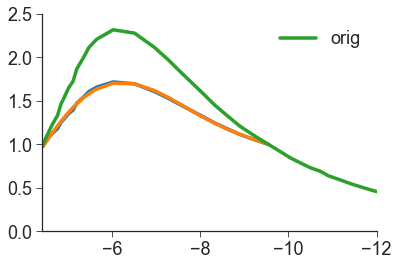

In [26]:
from scipy.optimize import curve_fit
def func_trigo(x,a0,a1,b1,w,a2,b2):
#def func_trigo(x,a0,a1,b1,w):
    return a0 + a1 * np.cos(x*w) + b1 * np.sin(x*w) + a2 * np.cos(2.*x*w) + b2 * np.sin(2.*x*w)

#x = np.array([-4.4,-4.537,-5.1, -5.6,-5.8,-6.021,-8.9,-9.3])
#y = np.array([1.,1.1192, 1.,1.5,1.51,1.5, 1.115,1.])
x = np.zeros(27)
y = np.zeros(27)
ratioIGFs = np.zeros(27)
high_T = -4.42
low_T  = -9.6

for j in range(len(tab2["T"])):
    if (tab2["T"][j] < high_T) and (tab2["T"][j] > low_T):
        k = j - 65
        x[k]= tab2["T"][j]
        inew = tab2["IGF"][j] - ((tab2["IGF"][j]-1.)/1.3169) * .6
        y[k]= inew
        ratioIGFs[k] = y[k] /tab2["IGF"][j] 
        
plt.plot(x,y)
plt.xlim(-4.4,-12)
plt.ylim(0,2.5)
z2, pcov = curve_fit(func_trigo, x, y)
a0, a1, b1, w,a2,b2 = z2
y2 = func_trigo(x,a0,a1,b1,w,a2,b2)
plt.plot(x, y2 )
plt.plot(tab2["T"], tab2["IGF"], label='orig')
plt.legend()
IGF_fitted = np.zeros(len(tabnew2["T"]))
for i in range(len(tabnew2["T"])):
    if (tabnew2["T"][i] < high_T) and (tabnew2["T"][i] > low_T):
        IGF_fitted[i] = func_trigo(tabnew2["T"][i],a0,a1,b1,w,a2,b2)
    else:
        IGF_fitted[i] = tabnew2["IGF"][i]
    

In [27]:
def lookup3(temp, var1, var2):
    if temp > var1.iloc[-1]:
        return var2.iloc[-1]
    elif temp < var1.iloc[0]:
        return var2.iloc[0]

    for i in range(len(var1)):
        if var1[i] > temp:
            interpolation = (temp - var1[i-1]) / (var1[i] - var1[i-1])
            gamma         = var2[i-1] + interpolation * (var2[i] - var2[i-1])
            return gamma
            break

[1.00131596 0.96035775 0.92139361 0.88615594 0.85791018 0.8323114
 0.81115394 0.79426962 0.77540343 0.75968341 0.74432111 0.74103328
 0.7509192  0.75979538 0.7726145  0.78865618 0.80861667 0.82024762
 0.83648318 0.85636445 0.88636117 0.91531628 0.95147484 0.97579772
 1.00192166 0.         0.        ]


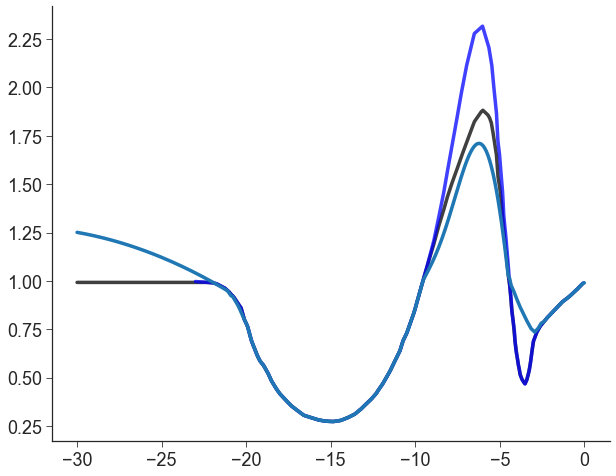

In [28]:
IGF_comp = np.zeros(len(T))
for j in range(len(T)):
    IGF_comp[j] = lookup3(T[j],tabnew["T"],tabnew['IGF'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,8])
plt.plot(T,IGF_comp,alpha=0.75, label='$\Gamma(T)$',c='black')
plt.plot(tablow["T"],tablow['IGF'],alpha=0.75, label='$\Gamma(T)$',c='blue')
plt.plot(tabnew2["T"], IGF_fitted)

print(ratioIGFs)

In [29]:
# Print IGF print to file
form      = ('%5.3f   %7.6f')
var       = np.zeros([len(tabnew2["T"]),2])
for i in range(len(tabnew2["T"])):
    var[i,0] = tabnew2["T"][i]
    var[i,1] = IGF_fitted[i]

np.savetxt('IGF_fitted.txt', var, fmt=form)

In [30]:
do = False
if do == True:
    f   = open('./curve_inherent.txt')
    tab = np.loadtxt(f)
    T = tab[:,0]
    igf = tab[:,1]


    for i in range(len(T)):
        var[i,0] = T[i]
        var[i,1] = igf[i]

    np.savetxt('IGF_conv.txt', var, fmt=form)